In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [17]:
dataset = pd.read_csv("Bank_data.csv")
dataset.head()

,loan_id,married,gender,dependency,Self_Employee,Applicant,coapplicant,Loan_amount,creadit_his,propert,loan_status
0,LN1000,Yes,Female,0,Yes,17154.0,13688.0,133487.0,0.0,Rural,Rejected
1,LN1001,Yes,Male,0,Yes,NaN,2995.0,50849.0,1.0,Urban,Rejected
2,LN1002,Yes,Male,1,No,21923.0,3046.0,85520.0,0.0,Semiurban,Rejected
3,LN1003,NaN,Female,3+,No,19718.0,14947.0,NaN,1.0,Rural,Rejected
4,LN1004,Yes,Female,3+,Yes,9636.0,319.0,299794.0,0.0,Rural,Rejected


In [18]:
dataset.isnull().sum()

loan_id           0
married          23
gender           32
dependency       17
Self_Employee    25
Applicant        38
coapplicant      27
Loan_amount      32
creadit_his      26
propert          27
loan_status      25
dtype: int64

In [19]:
dataset["coapplicant"].fillna(dataset["coapplicant"].mode()[0] , inplace=True)

C:\Users\lenovo\anaconda3\ipykernel_8472\3142570986.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset["coapplicant"].fillna(dataset["coapplicant"].mode()[0] , inplace=True)


C:\Users\lenovo\anaconda3\ipykernel_8472\83491136.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["coapplicant"])


<Axes: xlabel='coapplicant', ylabel='Density'>

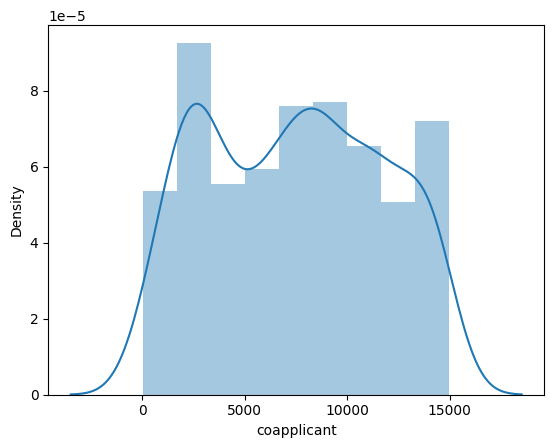

In [20]:
sns.distplot(dataset["coapplicant"])


In [21]:
q1 = dataset["coapplicant"].quantile(0.25)
q3 = dataset["coapplicant"].quantile(0.75)
q1 , q3

(np.float64(3505.5), np.float64(11008.5))

In [22]:
IQR = q3-q1
IQR

np.float64(7503.0)

In [23]:
min = q1-(1.5*IQR)
max = q3+(1.5*IQR)
min , max

(np.float64(-7749.0), np.float64(22263.0))

In [24]:
dataset = dataset[dataset["coapplicant"]<=max]

In [25]:
from sklearn.preprocessing import FunctionTransformer

In [ ]:
ft = FunctionTransformer(func=np.log1p) #Use log1p to avoid log(0)

In [27]:
ft.fit(dataset[["coapplicant"]])

FunctionTransformer(func=<ufunc 'log1p'>)

In [29]:
dataset["coapplicant_ft"]=ft.transform(dataset[["coapplicant"]])

C:\Users\lenovo\anaconda3\ipykernel_8472\3257342725.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["coapplicant"])


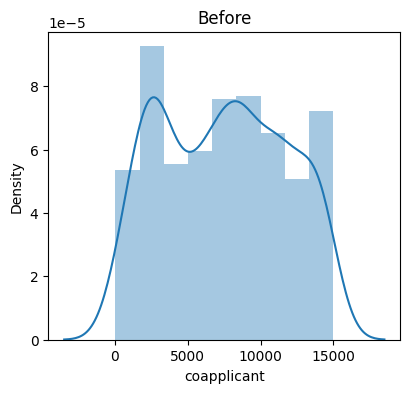

C:\Users\lenovo\anaconda3\ipykernel_8472\3257342725.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["coapplicant_ft"])


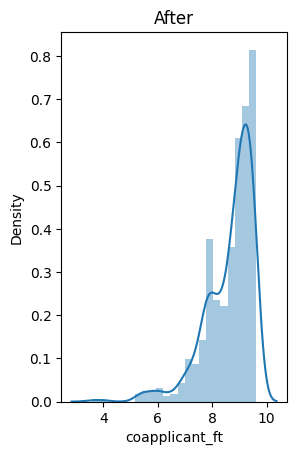

In [34]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.distplot(dataset["coapplicant"])
plt.title('Before')
plt.show()

plt.subplot(1, 2, 2)
sns.distplot(dataset["coapplicant_ft"])
plt.title('After')
plt.show()

